In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to load the JSON data
def load_json_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Function to extract "phrase_similarity" values from the loaded data
def extract_phrase_similarity(data):
    return [abs(item["phrase_similarity"]) for item in data]

In [13]:
# Function to plot the distribution with one y-axis
def plot_distribution(phrase_sim_baseline, phrase_sim_eval, scale_baseline=1.0, scale_eval=1.0, title='', eval_label='Baseline'):
    plt.figure()

    # Baseline dataset
    weights_baseline = np.ones_like(phrase_sim_baseline) * scale_baseline
    plt.hist(phrase_sim_baseline, bins=30, alpha=0.5, label=eval_label, color='green', weights=weights_baseline)

    # Evaluation dataset
    weights_eval = np.ones_like(phrase_sim_eval) * scale_eval
    plt.hist(phrase_sim_eval, bins=30, alpha=0.5, label='LLM Generated', color='red', weights=weights_eval)

    # Set labels and title with bold and larger font
    plt.xlabel('Phrase Similarity', fontsize=12, fontweight='bold')
    plt.ylabel('Frequency', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')

    # Make the x-axis labels bold and larger
    plt.xticks(fontsize=12, fontweight='bold', rotation=45)
    plt.yticks(fontsize=12, fontweight='bold')

    # Add legend
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
# Function to extract "phrase_similarity" values from the loaded data
def extract_experiment_phrase_similarity(data):
    phrase_similarities = []
    for obj in data:
        for model in ["Mistral-7B-Instruct-v0.3", "Meta-Llama-3-8B-Instruct"]:
            for cte in obj[f"{model}-CTEs"]['ctes']:
                phrase_similarities.append(cte['phrase-similarity'])

    return phrase_similarities

#### Compare Github to Model Similarities for Github CTE Code

In [9]:
# Function to extract "phrase_similarity" values from the loaded data
def extract_model_phrase_similarity(data):
    return [abs(item["Mistral-7B-Instruct-v0.3-phrase_similarity"]) for item in data]

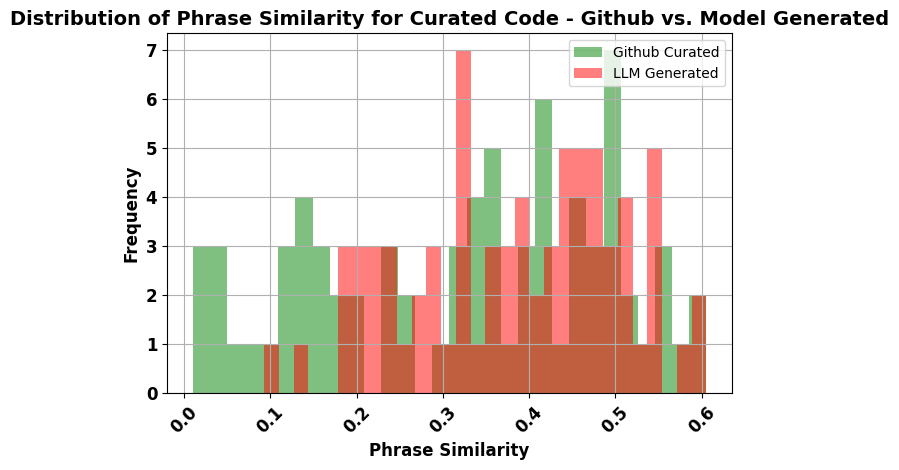

In [17]:
github_high_stars_json = 'data_files/curated_ctes.json'

high_stars_data = load_json_data(github_high_stars_json)

og_similarities = extract_phrase_similarity(high_stars_data)
model_similarities = extract_model_phrase_similarity(high_stars_data)

# Plot Baseline vs Evaluation 1
plot_distribution(
    og_similarities, 
    model_similarities, 
    scale_baseline=1.0, scale_eval=1.0, 
    title='Distribution of Phrase Similarity for Curated Code - Github vs. Model Generated',
    eval_label='Github Curated'
)


In [11]:
# Function to plot the distribution with one y-axis
def plot_distribution_spider(phrase_sim_baseline, phrase_sim_eval, scale_baseline=1.0, scale_eval=1.0, title='', eval_label='Baseline'):
    plt.figure()

    # Baseline dataset
    weights_baseline = np.ones_like(phrase_sim_baseline) * scale_baseline
    plt.hist(phrase_sim_baseline, bins=30, alpha=0.5, label='SPIDER-2-LITE', color='purple', weights=weights_baseline)

    # Evaluation dataset
    weights_eval = np.ones_like(phrase_sim_eval) * scale_eval
    plt.hist(phrase_sim_eval, bins=30, alpha=0.5, label=eval_label, color='red', weights=weights_eval)

    # Set labels and title with bold and larger font
    plt.xlabel('Phrase Similarity', fontsize=12, fontweight='bold')
    plt.ylabel('Frequency', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')

    # Make the x-axis labels bold and larger
    plt.xticks(fontsize=12, fontweight='bold', rotation=45)
    plt.yticks(fontsize=12, fontweight='bold')

    # Add legend
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

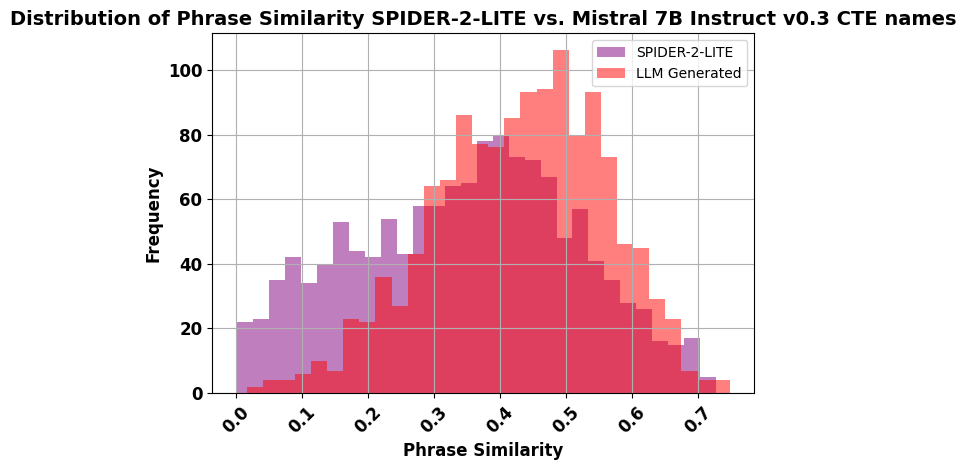

In [10]:
spider_json = 'data_files/spider2-lite-ctes.json'

spider_data = load_json_data(spider_json)

og_similarities = extract_phrase_similarity(spider_data)
model_similarities = extract_model_phrase_similarity(spider_data)

# Plot Baseline vs Evaluation 1
plot_distribution_spider(
    og_similarities, 
    model_similarities, 
    scale_baseline=1.0, scale_eval=1.0, 
    title='Distribution of Phrase Similarity SPIDER-2-LITE vs. Mistral 7B Instruct v0.3 CTE names',
    eval_label='LLM Generated'
)
